In [77]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [78]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

red_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-red.csv', sep=';')
white_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-white.csv',sep=';')

In [79]:
# Checking null values

red_df.isnull().sum()
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [80]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [81]:
#creating new column

red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=7 else 'high')

white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=7 else 'high')



In [82]:
# transforming these labels into categrical data type

red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high'])

white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

In [83]:
# Combine the two datasets into wines.

red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

wines = pd.concat([red_df, white_df])

In [84]:
# Re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)


In [85]:
comparative_df= pd.concat([red_df.describe(), white_df.describe()], axis='columns', keys=['Red Wine', 'White Wine'])

comparative_df.head()

Red Wine                                                            \
      fixed acidity volatile acidity  citric acid residual sugar    chlorides   
count   1599.000000      1599.000000  1599.000000    1599.000000  1599.000000   
mean       8.319637         0.527821     0.270976       2.538806     0.087467   
std        1.741096         0.179060     0.194801       1.409928     0.047065   
min        4.600000         0.120000     0.000000       0.900000     0.012000   
25%        7.100000         0.390000     0.090000       1.900000     0.070000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         1599.000000          1599.000000  1599.000000  1599.000000   
mean            15.874922            46.467792     0.996747     3.311113   
std             10.460157            32.895324     0.001887     0.154386   
min              1.000000             6.000000     0.990070     2.740000   
25%              7.000000            22.000000     0.995600     3.210000   

                    ...   White Wine                              \
         sulphates  ...  citric acid residual sugar    chlorides   
count  1599.000000  ...  4898.000000    4898.000000  4898.000000   
mean      0.658149  ...     0.334192       6.391415     0.045772   
std       0.169507  ...     0.121020       5.072058     0.021848   
min       0.330000  ...     0.000000       0.600000     0.009000   
25%       0.550000  ...     0.270000       1.700000     0.036000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         4898.000000          4898.000000  4898.000000  4898.000000   
mean            35.308085           138.360657     0.994027     3.188267   
std             17.007137            42.498065     0.002991     0.151001   
min              2.000000             9.000000     0.987110     2.720000   
25%             23.000000           108.000000     0.991723     3.090000   

                                              
         sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  
mean      0.489847    10.514267     5.877909  
std       0.114126     1.230621     0.885639  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  

[5 rows x 24 columns]

In [107]:
wine_ammount=pd.DataFrame(data=(wines['wine_type'].value_counts()))

wine_ammount



,wine_type
white,4898
red,1599


       wine_type
white       4898
red         1599


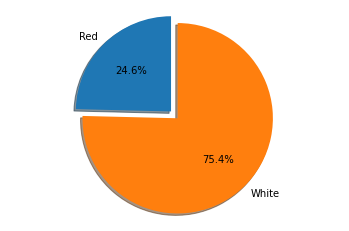

In [108]:
# Pie chart wine Red/White:

wine_ammount=pd.DataFrame(data=(wines['wine_type'].value_counts()))
print(wine_ammount)


labels = 'Red', 'White'
sizes = [wine_ammount.iloc[1,0], wine_ammount.iloc[0,0]]
explode = (0.1, 0.0)  
# "explode" the 1st slice (Red)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
#%reset